# 제5장 다차원척도법(MDS)

### (1) 자료읽기

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽기
auto = pd.read_csv("./data/auto.csv")
auto.head()

,autoName,length,width,enginesize,fuel,price
0,visto,3495,1495,798,21.5,540
1,tico,3340,1400,796,21.0,550
2,Matiz,3495,1495,796,22.2,555
3,Atos,3495,1495,798,22.0,571
4,Spectra,4510,1720,1493,20.8,540


### (2) 표준화 변수 만들기

In [30]:
# 변수 선택
X = auto.iloc[:, 1:]

# 각 케이스 이름
autoName = auto["autoName"]
autoName = list(autoName)

# z-표준화
from sklearn.preprocessing import StandardScaler
zX = StandardScaler().fit_transform(X)

# 0-1 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
z01X = scaler.fit_transform(X)

### (3) 거리행렬 만들기

In [25]:
from sklearn.metrics import pairwise_distances
z01X_dist = pairwise_distances(z01X, metric='euclidean')
z01X_dist.shape
z01X_dist[0:3, 0:3]

array([[0.        , 0.22365477, 0.04628556],
       [0.22365477, 0.        , 0.23487133],
       [0.04628556, 0.23487133, 0.        ]])

### (4) MDS 실행

In [32]:
from sklearn.manifold import MDS
cmds = MDS(n_components=2, random_state=0, dissimilarity='precomputed')
mds1 = cmds.fit(z01X_dist)
mds1_coords = cmds.fit_transform(z01X_dist)
mds1_coords[0:5]

c:\Users\robin\miniconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\robin\miniconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


array([[-0.07548859, -0.96392073],
       [-0.17095895, -1.11082908],
       [-0.01388066, -0.99205898],
       [-0.01094899, -0.98482627],
       [ 0.43203045, -0.30018364]])

### (5) 그림 그리기

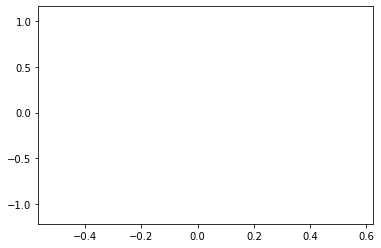

In [33]:
# 그림 그리기
plt.figure()
plt.scatter(mds1_coords[:,0], mds1_coords[:,1], facecolors='none', edgecolors='none')
labels = autoName

In [34]:
# MDS 각 케이스에 라벨 붙이기
for lable, x, y in zip (labels, mds1_coords[:,0], mds1_coords[:1]) :
    plt.annotate(labels, (x,y), xycoords='data') 

plt.xlabel('First dimension') 
plt.ylabel('Second dimension') 
plt.title('Metric MDS') 
plt.show() 

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 432x288 with 1 Axes>